In [ ]:
import numpy as np
import pandas as pd
from faker import Faker
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_parquet(r'data_center\daily_weather.parquet')
print(df.head())
list_sub_city_name = df['city_name'].unique()
print(len(list_sub_city_name))
df.info()

  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

In [23]:
df_cities = pd.read_csv(r'data_center\cities.csv')

print(df_cities.head())

df_countries = pd.read_csv(r'data_center\countries.csv')

print(df_countries.head())

  station_id   city_name      country       state iso2 iso3   latitude  \
0      41515    Asadabad  Afghanistan       Kunar   AF  AFG  34.866000   
1      38954    Fayzabad  Afghanistan  Badakhshan   AF  AFG  37.129761   
2      41560   Jalalabad  Afghanistan   Nangarhar   AF  AFG  34.441527   
3      38947      Kunduz  Afghanistan      Kunduz   AF  AFG  36.727951   
4      38987  Qala i Naw  Afghanistan     Badghis   AF  AFG  34.983000   

   longitude  
0  71.150005  
1  70.579247  
2  70.436103  
3  68.872530  
4  63.133300  
          country     native_name iso2 iso3  population       area    capital  \
0     Afghanistan       افغانستان   AF  AFG  26023100.0   652230.0      Kabul   
1         Albania       Shqipëria   AL  ALB   2895947.0    28748.0     Tirana   
2         Algeria         الجزائر   DZ  DZA  38700000.0  2381741.0    Algiers   
3  American Samoa  American Samoa   AS  ASM     55519.0      199.0  Pago Pago   
4          Angola          Angola   AO  AGO  24383301.0  124

Je fais un filtre sur les années

In [ ]:
df['year'] = df['date'].dt.year
df_filtered = df[(df['year'] >= 1970) & (df['year'] <= 2000)]
result = df_filtered.groupby(['city_name', 'year'])['avg_temp_c'].mean().reset_index()
result = result.sort_values(by=['city_name', 'year'])
result = result.dropna(subset=['avg_temp_c'])
print(result)

Ajout des informations sur les villes

In [25]:
df_weather_enriched = df_filtered.merge(
    df_cities[['city_name', 'country', 'iso2']], 
    on='city_name', 
    how='left'
)

df_weather_enriched

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,year,country,iso2
0,41515,Asadabad,1973-01-21,Winter,-0.6,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF
1,41515,Asadabad,1973-02-03,Winter,3.5,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF
2,41515,Asadabad,1973-02-12,Winter,7.2,2.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF
3,41515,Asadabad,1973-02-18,Winter,8.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF
4,41515,Asadabad,1973-02-24,Winter,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609456,67975,Masvingo,2000-12-27,Summer,19.1,15.7,23.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW
10609457,67975,Masvingo,2000-12-28,Summer,22.4,15.0,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW
10609458,67975,Masvingo,2000-12-29,Summer,22.5,15.9,30.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW
10609459,67975,Masvingo,2000-12-30,Summer,23.8,15.1,31.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW


Ajout des continents (je n'ai pas compris pourquoi continent_x et _y)

In [27]:
df_weather_enriched = df_weather_enriched.merge(
    df_countries[['country', 'continent', 'region']],
    on='country',
    how='left'
)
df_weather_enriched

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,year,country,iso2,continent_x,region_x,continent_y,region_y
0,41515,Asadabad,1973-01-21,Winter,-0.6,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF,Asia,Southern and Central Asia,Asia,Southern and Central Asia
1,41515,Asadabad,1973-02-03,Winter,3.5,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF,Asia,Southern and Central Asia,Asia,Southern and Central Asia
2,41515,Asadabad,1973-02-12,Winter,7.2,2.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF,Asia,Southern and Central Asia,Asia,Southern and Central Asia
3,41515,Asadabad,1973-02-18,Winter,8.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF,Asia,Southern and Central Asia,Asia,Southern and Central Asia
4,41515,Asadabad,1973-02-24,Winter,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,Afghanistan,AF,Asia,Southern and Central Asia,Asia,Southern and Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609456,67975,Masvingo,2000-12-27,Summer,19.1,15.7,23.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW,Africa,Eastern Africa,Africa,Eastern Africa
10609457,67975,Masvingo,2000-12-28,Summer,22.4,15.0,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW,Africa,Eastern Africa,Africa,Eastern Africa
10609458,67975,Masvingo,2000-12-29,Summer,22.5,15.9,30.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW,Africa,Eastern Africa,Africa,Eastern Africa
10609459,67975,Masvingo,2000-12-30,Summer,23.8,15.1,31.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,Zimbabwe,ZW,Africa,Eastern Africa,Africa,Eastern Africa


In [31]:
result_by_continent = df_weather_enriched.groupby(['continent_x', 'year'], observed=True)['avg_temp_c'].mean().reset_index()

print(result_by_continent)

       continent_x  year  avg_temp_c
0           Africa  1970         NaN
1           Africa  1971         NaN
2           Africa  1972         NaN
3           Africa  1973   24.298182
4           Africa  1974   23.082270
..             ...   ...         ...
209  South America  1996   20.188280
210  South America  1997   20.808718
211  South America  1998   20.724086
212  South America  1999   20.003702
213  South America  2000   20.090142

[214 rows x 3 columns]


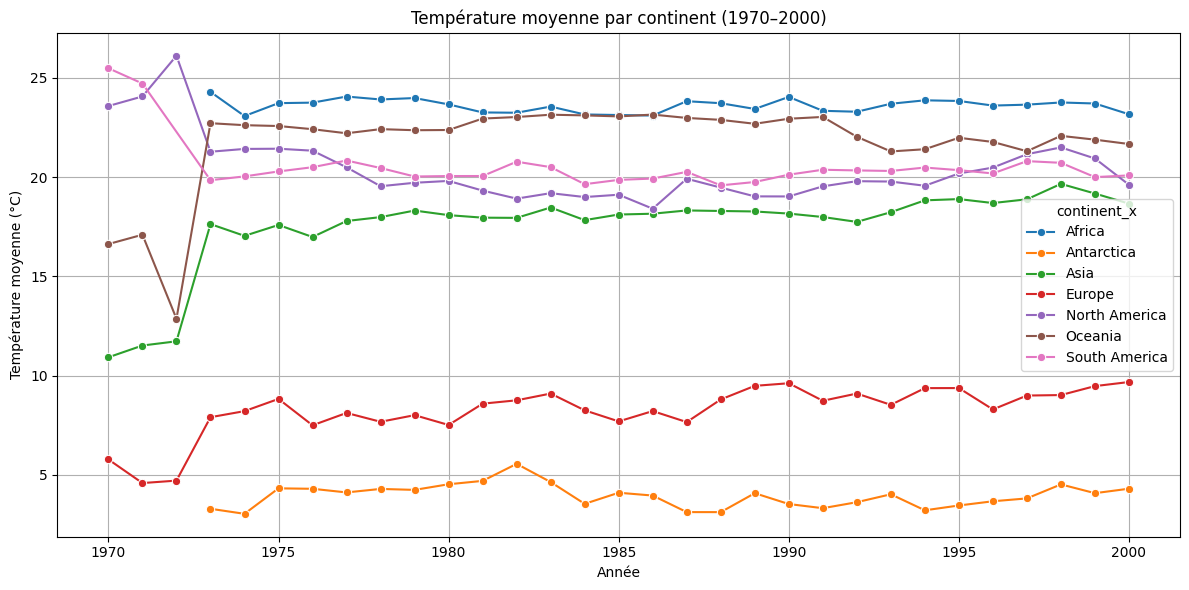

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=result_by_continent, x='year', y='avg_temp_c', hue='continent_x', marker='o')
plt.title("Température moyenne par continent (1970–2000)")
plt.xlabel("Année")
plt.ylabel("Température moyenne (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

Resultat par régions

In [35]:
result_by_region = df_weather_enriched.groupby(['region_y', 'year'], observed=True)['avg_temp_c'].mean().reset_index()

print(result_by_region)

           region_y  year  avg_temp_c
0        Antarctica  1973    3.290000
1        Antarctica  1974    3.036364
2        Antarctica  1975    4.320325
3        Antarctica  1976    4.297312
4        Antarctica  1977    4.114250
..              ...   ...         ...
733  Western Europe  1996    9.231250
734  Western Europe  1997   10.596611
735  Western Europe  1998   10.409834
736  Western Europe  1999   10.755151
737  Western Europe  2000   11.019289

[738 rows x 3 columns]


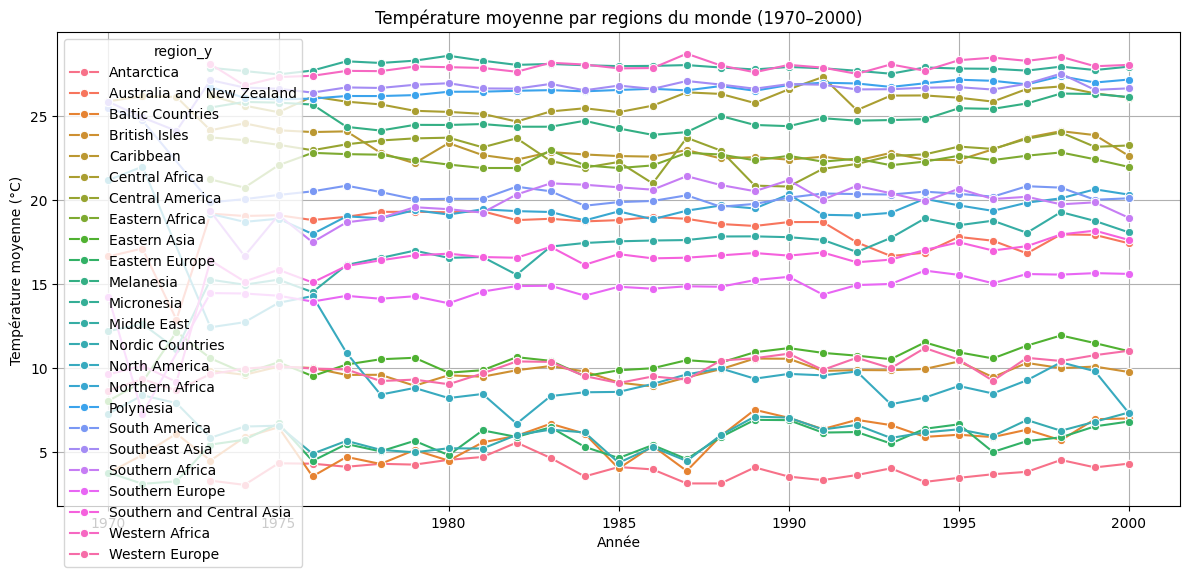

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=result_by_region, x='year', y='avg_temp_c', hue='region_y', marker='o')
plt.title("Température moyenne par regions du monde (1970–2000)")
plt.xlabel("Année")
plt.ylabel("Température moyenne (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()